# MODULE 1

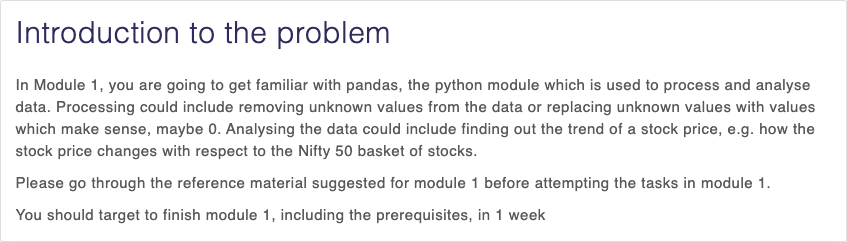

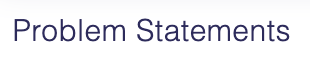

In [406]:
#importing the libraries
import pandas as pd
import numpy as np

## 1.1

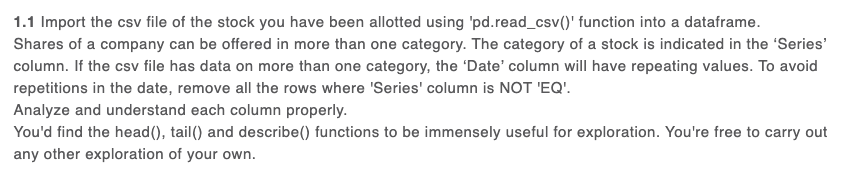

In [407]:
#importing the file
ds = pd.read_csv('AAPL (1).csv')

In [408]:
#top 5 datavalues 
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


In [409]:
#describing the dataset
ds.describe()

,Close Price,Open Price,High Price,Low Price
count,503.000000,503.000000,503.000000,503.000000
mean,189.891670,189.787217,191.627137,188.084076
std,21.231769,21.198211,21.340226,21.131357
min,142.190000,143.980000,145.720000,142.000000
25%,172.980000,173.020000,174.525000,171.715000
50%,187.900000,187.720000,189.220000,186.020000
75%,207.065000,205.925000,208.095000,203.950000
max,243.580000,244.660000,244.750000,241.810000


In [410]:
#Number of rows and columns
print('Number of rows and columns are :',ds.shape)

Number of rows and columns are : (503, 6)


## 1.2

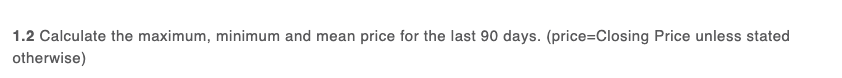

In [411]:
#90 datavalues taken from top

In [412]:
ds['Close Price'].head(90).max()

243.58

In [413]:
ds['Close Price'].head(90).min()

193.34

In [414]:
ds['Close Price'].head(90).mean()

212.80111111111108

## 1.3

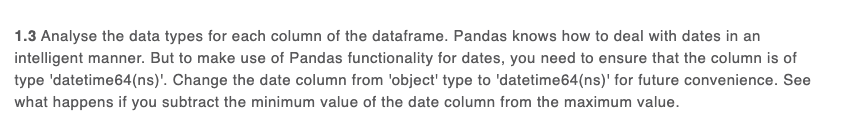

In [415]:
ds['Date'].dtype

dtype('O')

In [416]:
#Converting from object to datetime datatye
ds['Date']= pd.to_datetime(ds['Date']) 

In [417]:
#After converting
ds['Date'].dtype

dtype('<M8[ns]')

In [418]:
#Maximum and Minimum value difference
ds['Date'].max()-ds['Date'].min()

Timedelta('729 days 00:00:00')

## 1.4

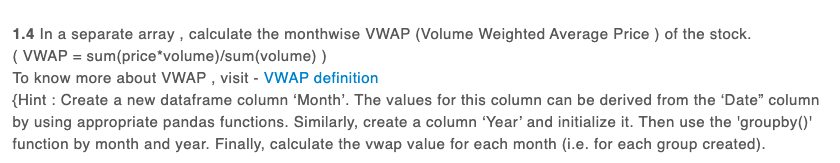

In [419]:
#Making an attribute of MONTH
ds['Month']=pd.DatetimeIndex(ds['Date']).month

In [420]:
#Making an attribute of YEAR
ds['Year'] = pd.DatetimeIndex(ds['Date']).year

In [421]:
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year
0,2019-10-24,243.58,244.66,244.75,241.81,17.92M,10,2019
1,2019-10-23,243.18,242.10,243.24,241.22,19.93M,10,2019
2,2019-10-22,239.96,241.16,242.20,239.62,22.68M,10,2019
3,2019-10-21,240.51,237.52,240.99,237.32,22.37M,10,2019
4,2019-10-18,236.41,234.59,237.58,234.29,24.38M,10,2019


In [422]:
#Removing 'M' from the TOTAL TRADED QUANTITY
ds['Total Traded Quantity'] = [x.strip('M') for x in ds['Total Traded Quantity']]

In [423]:
#Converting string value to numeric to perform calculations
ds['Total Traded Quantity'] = pd.to_numeric(ds['Total Traded Quantity'])

In [424]:
#Making an attribute of VWAP
ds['VWAP'] = (ds['Close Price'] * ds['Total Traded Quantity'])/ds['Total Traded Quantity']

In [425]:
#VWAP value monthwise yearwise
ds.groupby(['Month','Year']).agg({'VWAP' : ['mean']})

VWAP
                  mean
Month Year            
1     2018  174.005238
      2019  154.166190
2     2018  167.638947
      2019  171.727895
3     2018  174.496190
      2019  183.293810
4     2018  169.834286
      2019  200.516190
5     2018  185.536818
      2019  191.273636
6     2018  188.621429
      2019  192.969000
7     2018  190.311429
      2019  205.216364
8     2018  213.346087
      2019  204.957727
9     2018  222.073684
      2019  217.995000
10    2017  162.526000
      2018  220.845652
      2019  232.258333
11    2017  172.406190
      2018  191.235714
12    2017  171.891500
      2018  164.266316

## 1.5

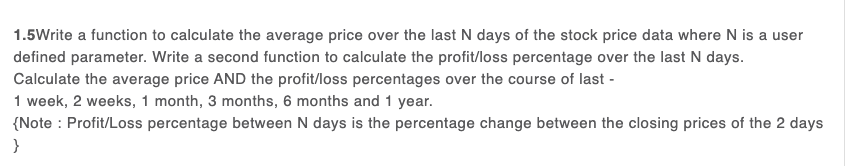

In [426]:
#Calculate AVERAGE PRICE 
def avg_Price(N):
    return ds['Close Price'].head(N).mean()

In [427]:
#Calculate PROFIT/LOSS PERCENTAGES
def ProLoss(N):
    diff = ds['Close Price'].head(N).iloc[-1] - ds['Close Price'].iloc[0]
    
    if(diff<0):
        lossP = -(diff/ds['Close Price'].head(N).iloc[-1])*100
        return lossP
    elif(diff>0):
        profitP =(diff/ds['Close Price'].head(N).iloc[-1])*100
        return profitP
    else:
        print('No profit No loss')

In [428]:
print('Average of last -')
print('1 WEEK :',avg_Price(7))
print('2 WEEK :',avg_Price(14))
print('1 MONTH :',avg_Price(30))
print('3 MONTH :',avg_Price(90))
print('6 MONTH :',avg_Price(180))
print('1 YEAR :',avg_Price(365))

Average of last -
1 WEEK : 239.04142857142855
2 WEEK : 234.94785714285717
1 MONTH : 227.38566666666668
3 MONTH : 212.80111111111108
6 MONTH : 200.5416111111112
1 YEAR : 196.55504109589052


In [429]:
print('PROFIT/LOSS PERCENTAGES of last -')
print('1 WEEK :',ProLoss(7),'%')
print('2 WEEK :',ProLoss(14),'%')
print('1 MONTH :',ProLoss(30),'%')
print('3 MONTH :',ProLoss(90),'%')
print('6 MONTH :',ProLoss(180),'%')
print('1 YEAR :',ProLoss(365),'%')

PROFIT/LOSS PERCENTAGES of last -
1 WEEK : 3.9296838332551127 %
2 WEEK : 7.2756099709327975 %
1 MONTH : 11.350857142857148 %
3 MONTH : 23.10102592611311 %
6 MONTH : 42.93762103162961 %
1 YEAR : 30.647929628835023 %


## 1.6

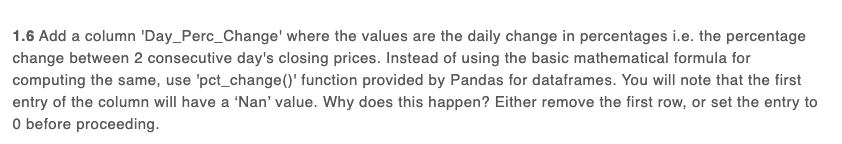

In [430]:
#Addition of new attribute 'Day_Perc_Change'
ds['Day_Perc_Change']=ds['Close Price'].pct_change().fillna(0)

In [431]:
ds

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change
0,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000
1,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642
2,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241
3,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292
4,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047
...,...,...,...,...,...,...,...,...,...,...
498,2017-10-31,169.04,167.90,169.65,166.94,36.05,10,2017,169.04,0.012883
499,2017-10-30,166.72,163.89,168.07,163.72,44.70,10,2017,166.72,-0.013725
500,2017-10-27,163.05,159.29,163.60,158.70,44.45,10,2017,163.05,-0.022013
501,2017-10-26,157.41,157.23,157.83,156.78,17.00,10,2017,157.41,-0.034591


## 1.7

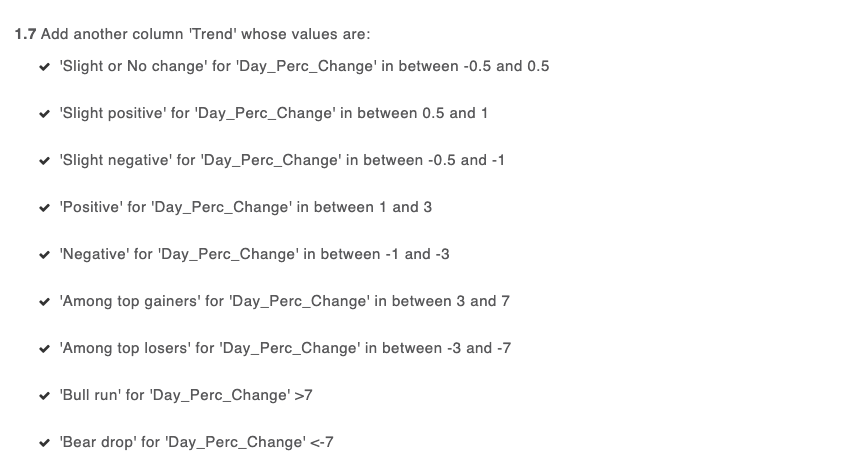

In [432]:
#Addition of new attribute 'Trend'
if ((ds['Day_Perc_Change'] >= -0.5) & (ds['Day_Perc_Change'] <= 0.5)).all():
    ds['Trend']='Slight or No Change'
elif ((ds['Day_Perc_Change'] >= 0.5) & (ds['Day_Perc_Change'] <= 1)).all():
    ds['Trend'] = 'Slight positive'
elif ((ds['Day_Perc_Change'] <= -0.5) & (ds['Day_Perc_Change'] >= -1)).all():
    ds['Trend'] = 'Slight negative'
elif ((ds['Day_Perc_Change'] >= 1) & (ds['Day_Perc_Change'] <= 3)).all():
    ds['Trend'] = 'Positive' 
elif ((ds['Day_Perc_Change'] <= -1) & (ds['Day_Perc_Change'] >= -3)).all():
    ds['Trend'] = 'Negative'
elif ((ds['Day_Perc_Change'] >= 3) & (ds['Day_Perc_Change'] <= 7)).all():
    ds['Trend'] = 'Among top gainers'
elif ((ds['Day_Perc_Change'] <= -3) & (ds['Day_Perc_Change'] >= -7)).all():
    ds['Trend'] = 'Among top losers'
elif (ds['Day_Perc_Change'] > 7).all():
    ds['Trend'] = 'Bull run' 
elif (ds['Day_Perc_Change'] < -7).all():
    ds['Trend'] = 'Bear drop' 

In [433]:
ds

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend
0,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change
1,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change
2,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change
3,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change
4,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change
...,...,...,...,...,...,...,...,...,...,...,...
498,2017-10-31,169.04,167.90,169.65,166.94,36.05,10,2017,169.04,0.012883,Slight or No Change
499,2017-10-30,166.72,163.89,168.07,163.72,44.70,10,2017,166.72,-0.013725,Slight or No Change
500,2017-10-27,163.05,159.29,163.60,158.70,44.45,10,2017,163.05,-0.022013,Slight or No Change
501,2017-10-26,157.41,157.23,157.83,156.78,17.00,10,2017,157.41,-0.034591,Slight or No Change


## 1.8

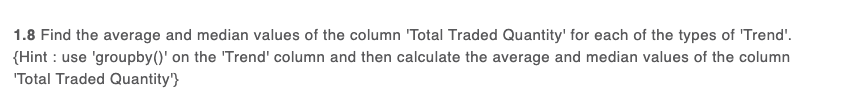

In [434]:
#MEAN MEDIAN value Trend wise
ds.groupby(['Trend']).agg({'Total Traded Quantity' : ['mean','median']})

Total Traded Quantity       
                                     mean median
Trend                                           
Slight or No Change              31.27334  27.96

## 1.9

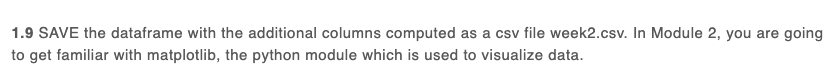

In [435]:
ds.to_csv('week2.csv')

## THANK YOU !